In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.graphics as sg


import matplotlib.pylab as plt

import seaborn as sns
sns.set_theme()

%matplotlib inline

In [2]:
df = pd.read_csv('../data/nts.csv', index_col=0, parse_dates=True)
df.shape

(42, 15)

In [3]:
df.head()

,rynek,inflacja_r,inflacja_q,stopa_procentowa,liczba_kredytow,tempo_wzrostu,ufnosc,duze_zakupy,bezrobocie,spr_detaliczna,pkb,wynag,inflacja_q_kum,ogolem,rpk
2014-03-31,6193.211456,100.6,100.2,0.0446,41942.0,104.2,-20.5,-16.3,13.5,105.5,103.8,3882.041728,1.000000,11854.000000,0.0
2014-06-30,6227.984614,100.3,100.0,0.0447,45499.0,104.1,-16.8,-15.0,12.0,105.1,103.9,3922.805136,1.002000,10285.333333,0.0
2014-09-30,6357.260998,99.7,99.5,0.0443,43653.0,103.3,-16.9,-12.7,11.5,102.6,104.2,3948.311807,1.002000,11241.333333,0.0
2014-12-31,6438.874574,99.3,99.6,0.0388,42993.0,103.3,-13.8,-10.7,11.4,103.7,103.9,3986.074690,0.996990,14341.333333,0.0
2015-03-31,6473.616559,98.5,99.5,0.0348,42169.0,104.0,-14.9,-11.5,11.5,104.4,104.3,4028.086865,0.993002,10567.666667,0.0


In [25]:
sns.color_palette("husl", 15)[0]

(0.9677975592919913, 0.44127456009157356, 0.5358103155058701)

AttributeError: FillBetweenPolyCollection.set() got an unexpected keyword argument 'c'

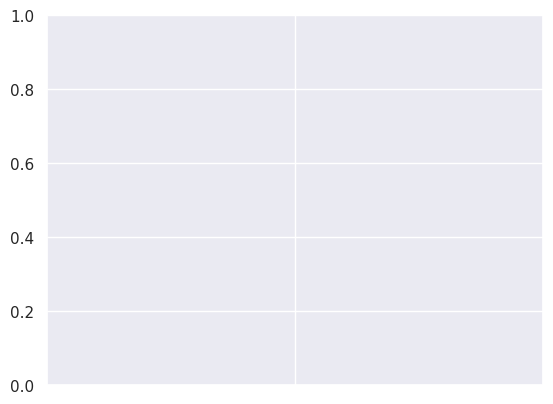

In [20]:
sns.boxplot(df[df.columns[2]], c=sns.color_palette("husl", 9))

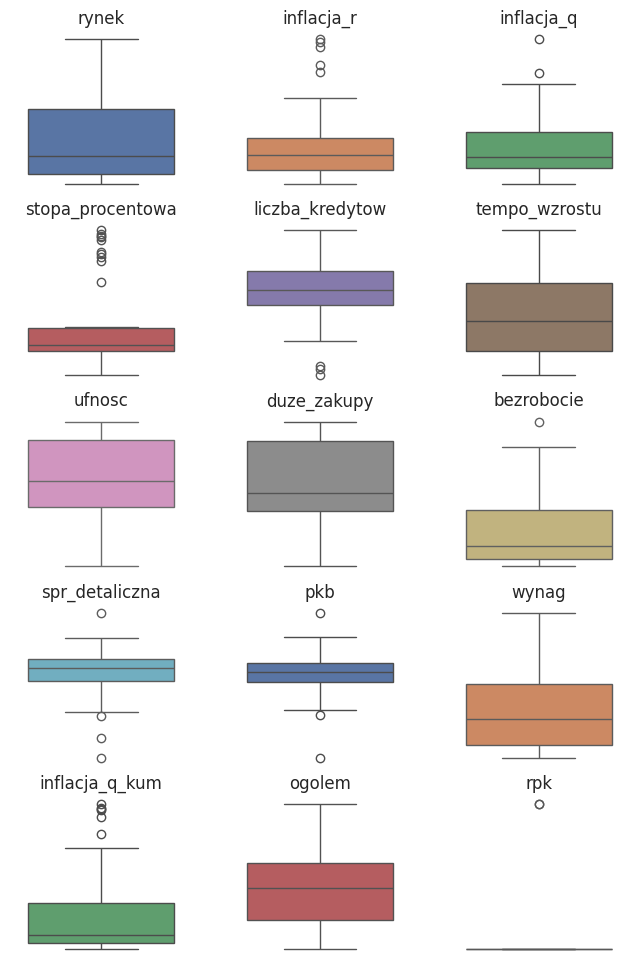

In [27]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(8,12))
for i, col in enumerate(df.columns):
    r, c = np.unravel_index(i, (5,3))
    axes[r,c].set_title(col)
    sns.boxplot(df[col], ax=axes[r,c], color=sns.color_palette(None, 15)[i])

for ax in axes.flatten():
    ax.set_axis_off()

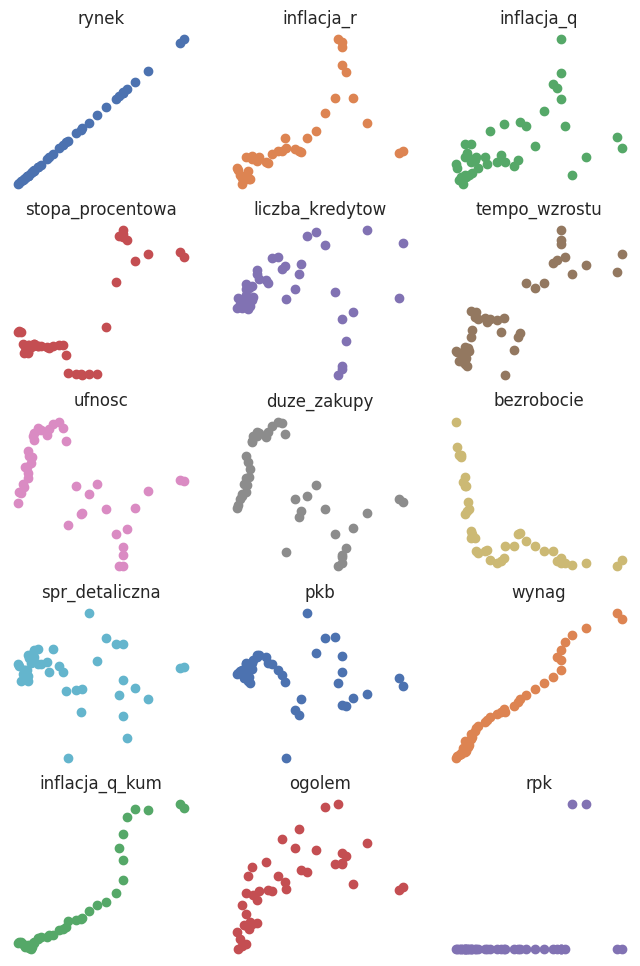

In [29]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(8,12))
for i, col in enumerate(df.columns):
    r, c = np.unravel_index(i, (5,3))
    axes[r,c].set_title(col)
    axes[r,c].scatter(df["rynek"], df[col], color=sns.color_palette(None, 15)[i])

for ax in axes.flatten():
    ax.set_axis_off()

In [28]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)


,rynek,inflacja_r,inflacja_q,stopa_procentowa,liczba_kredytow,tempo_wzrostu,ufnosc,duze_zakupy,bezrobocie,spr_detaliczna,pkb,wynag,inflacja_q_kum,ogolem,rpk
rynek,1.000,0.697,0.573,0.735,-0.020,0.850,-0.544,-0.556,-0.680,-0.216,-0.177,0.988,0.942,0.616,0.357
inflacja_r,0.697,1.000,0.813,0.772,-0.477,0.844,-0.708,-0.648,-0.585,-0.259,-0.099,0.730,0.702,0.651,0.188
inflacja_q,0.573,0.813,1.000,0.588,-0.286,0.737,-0.591,-0.497,-0.501,0.049,0.137,0.557,0.456,0.543,-0.136
stopa_procentowa,0.735,0.772,0.588,1.000,-0.513,0.806,-0.590,-0.602,-0.375,-0.195,-0.105,0.757,0.841,0.317,0.337
liczba_kredytow,-0.020,-0.477,-0.286,-0.513,1.000,-0.152,0.521,0.514,-0.133,0.377,0.302,-0.055,-0.188,0.037,0.133
tempo_wzrostu,0.850,0.844,0.737,0.806,-0.152,1.000,-0.484,-0.444,-0.687,0.028,0.162,0.868,0.817,0.589,0.260
ufnosc,-0.544,-0.708,-0.591,-0.590,0.521,-0.484,1.000,0.983,0.037,0.386,0.295,-0.503,-0.556,-0.354,-0.111
duze_zakupy,-0.556,-0.648,-0.497,-0.602,0.514,-0.444,0.983,1.000,0.007,0.453,0.382,-0.518,-0.598,-0.285,-0.180
bezrobocie,-0.680,-0.585,-0.501,-0.375,-0.133,-0.687,0.037,0.007,1.000,0.101,0.056,-0.728,-0.558,-0.709,-0.204
spr_detaliczna,-0.216,-0.259,0.049,-0.195,0.377,0.028,0.386,0.453,0.101,1.000,0.901,-0.260,-0.339,-0.155,-0.183


In [30]:
df.columns

Index(['rynek', 'inflacja_r', 'inflacja_q', 'stopa_procentowa',
       'liczba_kredytow', 'tempo_wzrostu', 'ufnosc', 'duze_zakupy',
       'bezrobocie', 'spr_detaliczna', 'pkb', 'wynag', 'inflacja_q_kum',
       'ogolem', 'rpk'],
      dtype='object')

In [32]:
ldf = df.drop(columns=['liczba_kredytow', 'spr_detaliczna'])

In [33]:
bn, fn = 35, 42
train, test = ldf.iloc[:bn], ldf.iloc[bn:fn]
train.index, test.index, len(train), len(test)

X_train = train.drop('rynek', axis=1)
y_train = train['rynek']

X_test = test.drop('rynek', axis=1)
y_test = test['rynek']

In [37]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)
print(f"Intercept: {lr_model.intercept_}")
coeff = lr_model.coef_
print(f"Coefficients: {coeff}")

preds = lr_model.predict(X_test)
test['rynek_Prediction'] = preds
preds

Intercept: -3070.3741428735966
Coefficients: [-5.20081974e+01  8.35695796e+01  3.67545372e+03 -1.04928839e+02
  5.89043360e+00 -1.52963234e+01  3.87060226e+01  4.68238393e+01
  2.24682185e+00  2.62874362e+03  6.95937270e-03  0.00000000e+00]


/tmp/ipykernel_166239/4021587274.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['rynek_Prediction'] = preds


array([12447.26937935, 12799.39487284, 13520.69819246, 14148.04375407,
       14726.31570023, 15451.81027748, 16162.46750284])

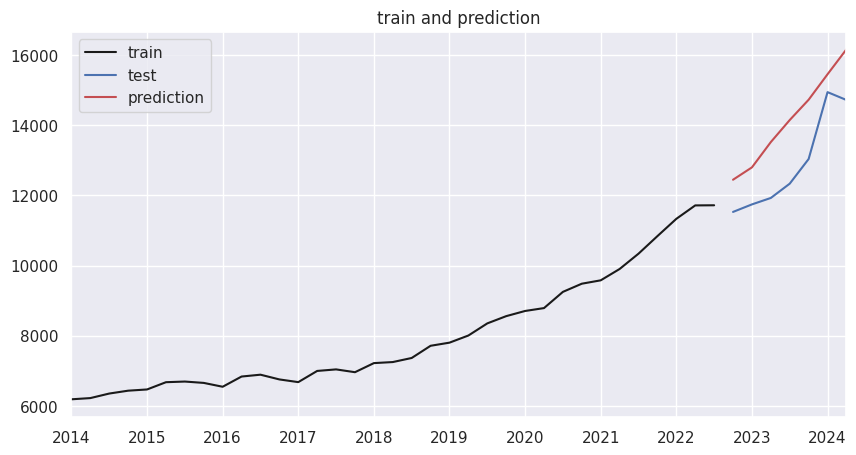

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=1)
train['rynek'].plot(style='k', figsize=(10,5), label = 'train', ax=axes)
test['rynek'].plot(style='b', figsize=(10,5), label = 'test', ax=axes)
test['rynek_Prediction'].plot(style='r', figsize=(10,5), label = 'prediction')
plt.title('train and prediction')
plt.legend()

In [43]:
bn, fn = 35, 42
train, test = df.iloc[:bn], df.iloc[bn:fn]
train.index, test.index, len(train), len(test)

X_train = train.drop('rynek', axis=1)
y_train = train['rynek']

X_test = test.drop('rynek', axis=1)
y_test = test['rynek']

In [44]:
X_train = sm.add_constant(X_train) # adding a constant
 
model_2 = sm.OLS(y_train, X_train).fit()
  
print_model = model_2.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                  rynek   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     264.7
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           3.11e-20
Time:                        05:52:54   Log-Likelihood:                -219.66
No. Observations:                  35   AIC:                             467.3
Df Residuals:                      21   BIC:                             489.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -159.5309   8472.040  

/home/volodya/code/ds/pkobp/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [45]:
model_2.rsquared_adj

0.990180069605904

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
bn, fn = 35, 42
train, test = df.iloc[:bn], df.iloc[bn:fn]
train.index, test.index, len(train), len(test)

X_train = train.drop('rynek', axis=1)
y_train = train['rynek']

X_test = test.drop('rynek', axis=1)
y_test = test['rynek']

In [63]:
rf_model = RandomForestRegressor(
    n_estimators = 200
    , max_depth = 6
    , random_state = 42
    )

# Fit the model 
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

/tmp/ipykernel_166239/4112200450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['rynek_Prediction'] = preds


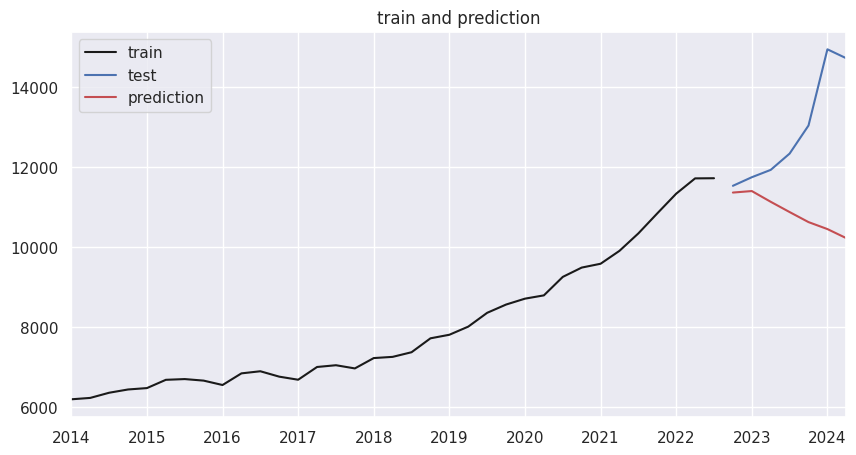

In [64]:
test['rynek_Prediction'] = preds
fig, axes = plt.subplots(nrows=1, ncols=1)
train['rynek'].plot(style='k', figsize=(10,5), label = 'train', ax=axes)
test['rynek'].plot(style='b', figsize=(10,5), label = 'test', ax=axes)
test['rynek_Prediction'].plot(style='r', figsize=(10,5), label = 'prediction')
plt.title('train and prediction')
plt.legend()